# Regression -Based Simpson's Paradox

In [1]:

#imports
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


import fairsim 
from fairsim import sp_plot

The basic version of SP in the regression form is the clustering model based SP- we use a gaussian mixture model and control parameters of the shape

In [2]:
# setup
r_clusters = -.6  # correlation coefficient of clusters
cluster_spread = .8 # pearson correlation of means
p_sp_clusters = .5 # portion of clusters with SP 
k = 5 # number of clusters
cluster_size = [2,3]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters = [1.0/k]*k

We choose the portion of the clusters to have SP and then can draw samples

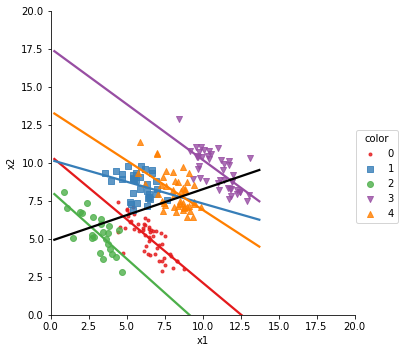

In [3]:
p_sp_clusters = .9
sp_df2 = fairsim.geometric_2d_gmm_sp(r_clusters,cluster_size,cluster_spread,
                                    p_sp_clusters, domain_range,k,N,p_clusters)
sp_plot(sp_df2,'x1','x2','color')

We can change the parameters and see variation

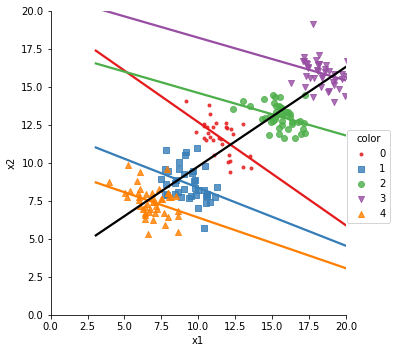

In [5]:
# setup
r_clusters = -.4  # correlation coefficient of clusters
cluster_spread = .8 # pearson correlation of means
p_sp_clusters = .6 # portion of clusters with SP 
k = 5 # number of clusters
cluster_size = [4,4]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters = [.5, .2, .1, .1, .1]

sp_df3 = fairsim.geometric_2d_gmm_sp(r_clusters,cluster_size,cluster_spread,
                                    p_sp_clusters, domain_range,k,N,p_clusters)
sp_plot(sp_df3,'x1','x2','color')

## Multiple Views

The first extension is to add multiple independent views, we have a wrapper function for that

200
4


,x1,x2,x3,x4,A,B
0,8.961543,11.109414,7.681803,11.530193,A4,B3
1,9.210403,10.903621,5.246785,7.090758,A4,B4
2,12.482323,8.609680,15.633933,14.419567,A1,B0
3,12.500233,6.741229,11.467543,10.250224,A1,B2
4,9.066961,5.856741,15.269694,15.555281,A2,B0


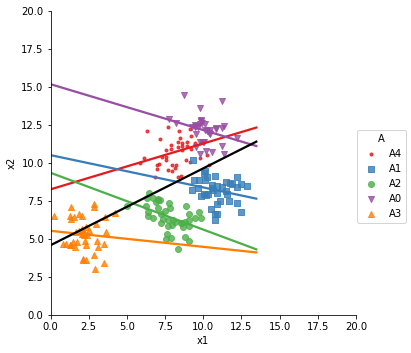

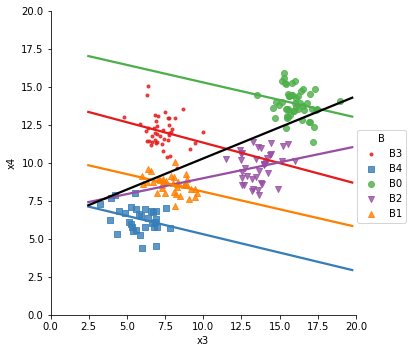

In [7]:
many_sp_df = fairsim.geometric_indep_views_gmm_sp(2,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)

sp_plot(many_sp_df,'x1','x2','A')
sp_plot(many_sp_df,'x3','x4','B')
many_sp_df.head()

The views do not have to have the same parameters though. We can make each parameter a list of values with the length set to the number of views. 

200
4


,x1,x2,x3,x4,A,B
0,8.961543,11.109414,7.681803,11.530193,A4,B3
1,9.210403,10.903621,5.246785,7.090758,A4,B4
2,12.482323,8.609680,15.633933,14.419567,A1,B0
3,12.500233,6.741229,11.467543,10.250224,A1,B2
4,9.066961,5.856741,15.269694,15.555281,A2,B0


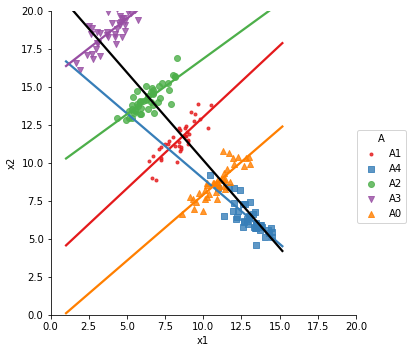

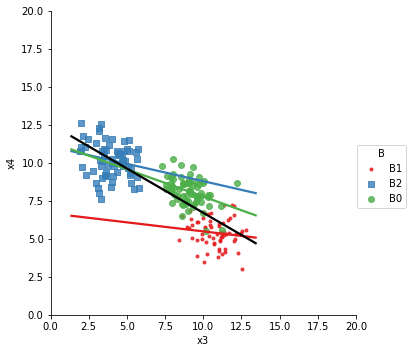

In [9]:
# setup
r_clusters = [.8, -.2]  # correlation coefficient of clusters
cluster_spread = [.8, .2] # pearson correlation of means
p_sp_clusters = [.6, 1] # portion of clusters with SP 
k = [5,3] # number of clusters
cluster_size = [4,4]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters = [[.5, .2, .1, .1, .1],[1.0/3]*3]


many_sp_df_diff = fairsim.geometric_indep_views_gmm_sp(2,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)

sp_plot(many_sp_df_diff,'x1','x2','A')
sp_plot(many_sp_df_diff,'x3','x4','B')
many_sp_df.head()